In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(16, activation = "relu", name = "hidden_layer_1"),
    Dense(16, activation = "relu", name = "hidden_layer_2"),
    Dense(10, activation = "softmax", name = "hidden_layer_3")
])

In [4]:
# Print the model summary
model.weights, model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 16)                12560     
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                272       
                                                                 
 hidden_layer_3 (Dense)      (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


([<tf.Variable 'hidden_layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
  array([[ 0.0199478 , -0.03961416, -0.06103358, ..., -0.06734598,
           0.06493564, -0.04233331],
         [-0.02469565, -0.05291372,  0.0756584 , ...,  0.04072504,
          -0.00128354, -0.0031862 ],
         [-0.04699212,  0.05349295, -0.02373095, ..., -0.01138222,
           0.03795902,  0.04194428],
         ...,
         [-0.08063783, -0.03120852,  0.02429991, ..., -0.00106507,
           0.06194501,  0.0112373 ],
         [-0.0050021 ,  0.07134131, -0.05659115, ..., -0.00693082,
           0.05781201,  0.04330659],
         [ 0.03652679, -0.04309097,  0.06191951, ..., -0.01336029,
           0.02896439, -0.0408544 ]], dtype=float32)>,
  <tf.Variable 'hidden_layer_1/bias:0' shape=(16,) dtype=float32, numpy=
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        dtype=float32)>,
  <tf.Variable 'hidden_layer_2/kernel:0' shape=(16, 16) dtype=float32, numpy=
  array([[-0.40

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation= "softmax")
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
# or you can change the padding and stride
model1 = Sequential([
    Conv2D(16, (3, 3), padding="same", strides= 2, activation="relu", input_shape = (28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation="softmax")
])

In [9]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


In [10]:
# or you can change the data format of the model
model2 = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape = (1, 28, 28), data_format="channels_first"),
    MaxPooling2D((3, 3), data_format="channels_first"),
    Flatten(),
    Dense(10, activation="softmax")
])

In [11]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 26, 26)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 8, 8)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [12]:
# Define the model optimizer, loss function and metrics
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuray"]
)


In [13]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)  # learning rate of the optimizer function
# or
print(model.optimizer.learning_rate)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [14]:
# or you can define model compile by
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=[acc, mae]
)

In [15]:
# Print the resulting model attributes
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)  # learning rate of the optimizer function
# or
print(model.optimizer.learning_rate)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [17]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [18]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [19]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [20]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

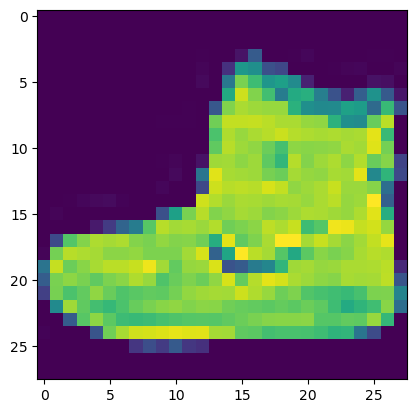

Label:  Ankle boot


In [21]:
# Display one of the images
img = train_images[0,:,:]
plt.imshow(img)
plt.show()
print("Label: ", labels[train_labels[0]])

#### Fit the model

In [22]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)


Epoch 1/8
235/235 - 4s - loss: 0.5413 - sparse_categorical_accuracy: 0.8119 - mean_absolute_error: 4.4200 - 4s/epoch - 16ms/step
Epoch 2/8
235/235 - 3s - loss: 0.3502 - sparse_categorical_accuracy: 0.8763 - mean_absolute_error: 4.4200 - 3s/epoch - 14ms/step
Epoch 3/8
235/235 - 3s - loss: 0.3201 - sparse_categorical_accuracy: 0.8857 - mean_absolute_error: 4.4200 - 3s/epoch - 13ms/step
Epoch 4/8
235/235 - 3s - loss: 0.3044 - sparse_categorical_accuracy: 0.8922 - mean_absolute_error: 4.4200 - 3s/epoch - 14ms/step
Epoch 5/8
235/235 - 3s - loss: 0.2938 - sparse_categorical_accuracy: 0.8941 - mean_absolute_error: 4.4200 - 3s/epoch - 14ms/step
Epoch 6/8
235/235 - 3s - loss: 0.2852 - sparse_categorical_accuracy: 0.8976 - mean_absolute_error: 4.4200 - 3s/epoch - 13ms/step
Epoch 7/8
235/235 - 3s - loss: 0.2764 - sparse_categorical_accuracy: 0.9000 - mean_absolute_error: 4.4200 - 3s/epoch - 13ms/step
Epoch 8/8
235/235 - 3s - loss: 0.2727 - sparse_categorical_accuracy: 0.9014 - mean_absolute_error

#### Plot training history

In [23]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.541295,0.811933,4.420002
1,0.350171,0.876283,4.419999
2,0.320128,0.885700,4.420001
3,0.304447,0.892167,4.420001
4,0.293780,0.894083,4.420000


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

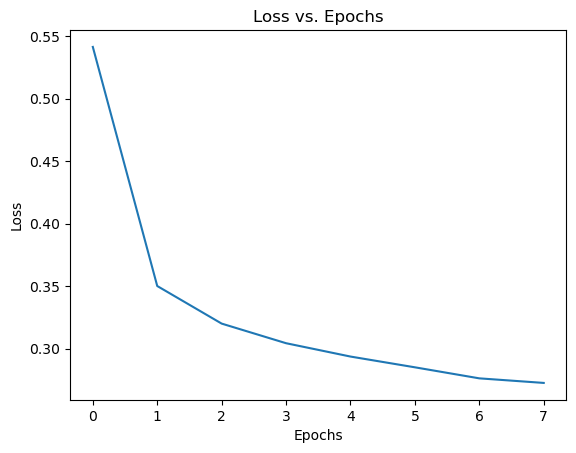

In [24]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel = "Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_accuracy')]

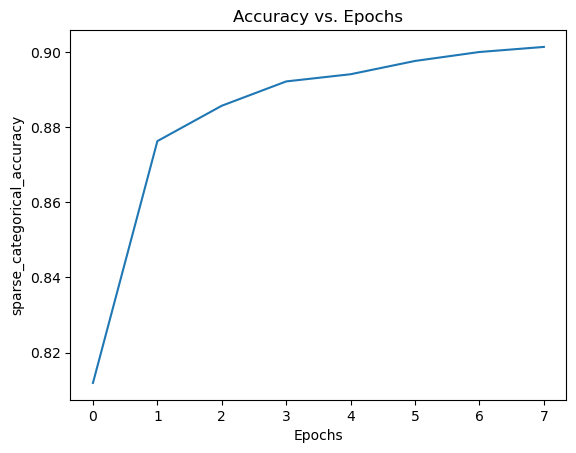

In [25]:
# Make a plot for the accuracy
loss_plot = df.plot(y="sparse_categorical_accuracy", title = "Accuracy vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel = "sparse_categorical_accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'MAE')]

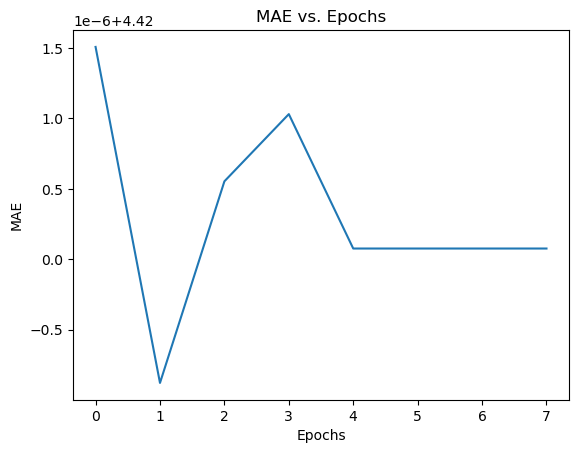

In [26]:
# Make a plot for the additional metric
loss_plot = df.plot(y="mean_absolute_error", title = "MAE vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel = "MAE")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [32]:
# Evaluate the model
test_loss, test_accuract, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3108 - sparse_categorical_accuracy: 0.8891 - mean_absolute_error: 4.4200


#### Make predictions from the model

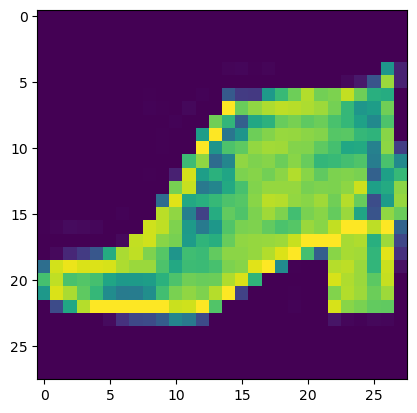

Label: Ankle boot


In [33]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [34]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,..., np.newaxis])
print("Nodel prediction: ",labels[np.argmax(predictions)])

1/1 [==============================] - 0s 52ms/step
Nodel prediction:  Ankle boot
